## Mid term Project

# Question 3

The ECG is the electrical manifestation of the contractile activity of the heart, and can be recorded fairly easily with 
surface electrodes on the limbs or chest, TheECG is perhaps the most commonly known. recognized, and used biomedical signal. 
The rhythm of the heart in terms of beats per minute (bpm) may be easily e tirnatedby counting the readily identifiable waves.

The EEG (popularly known as brain waves) represents the electrical activity of the brain. A few important aspects of the 
organization of the brain are as follows: The main parts of the brain are the cerebrum, the cerebellum, the brain stem 
(including the midbrain, pons medulla, and the reticular formation), and the thalamu (between the midbrain and the hemispheres).
The cerebrum  is divided intotwo hemispheres. separated by a longitudinal fissure across which there is a large connective 
band of fibers known as the corpus callosum. The outer urface of the cerebral hemi pheres, known as the cerebral cortex,
i compo ed of neuron (grey matter) in convoluted patterns, and separated into region by fissure ( ulci). Beneath the cortex 
lie nerve fibers that lead to other part of the brain and the body (white matter).

# Question 4


 The length of the file is: 43081 as expected from 43081 samples x 1 lines

 The length of the time array is: 43081


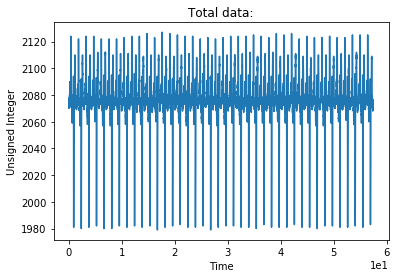

In [32]:
# %matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division

# simple program for python
file = open('aami3a.dat','rb')
#here by using a numpy file (np.) it is a command to read from file into an array
AllSignal = np.fromfile(file,count=-1,dtype=np.uint16)
#to verify the size of lenght of the array  
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 43081 samples x 1 lines')
#step for 1/120MHz and a total of 5500
x=np.arange(0,43081/750.,1/750.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
plt.subplot(111)
plt.plot(x,AllSignal[:43081])
plt.title('Total data:')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer')
plt.ticklabel_format( axis='x', scilimits=(0,0))
file.close()

# Question5

For a person having 60 or 100 beats per minute. Then we need to plot samples till 7 sec (5 sec for beats and 2 sec for signal taking and reverse recovery pulse) to include 5 beats with reverse recovery pulse. Assume Sampling time is ST,Sampling  Frequency F and Required samples N.

$$ST=\frac{1}{F} $$

$$ N=\frac{7}{ST}$$

$$N=5250$$
This is a sampling techique will work for all samples between 60 and 100. Here the process is same

# Question 6

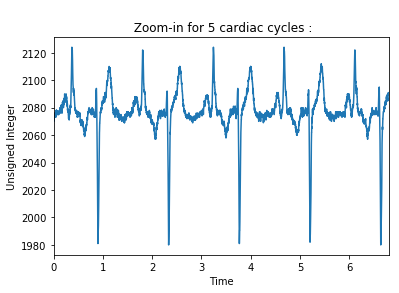

In [33]:

x1=np.arange(0,5250/750.,1/750.)
plt.plot(x1,AllSignal[:5250])
plt.title('\n Zoom-in for 5 cardiac cycles :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer')
plt.xlim([0,6.8])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# Question7

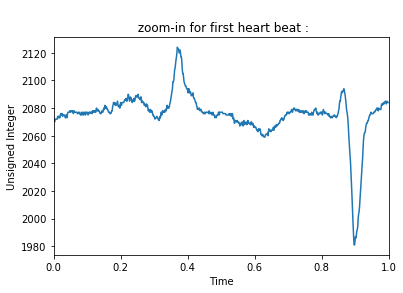

In [34]:

x1=np.arange(0,750/750.,1/750.)
plt.plot(x1,AllSignal[:750])
plt.title('\n zoom-in for first heart beat :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer')
plt.xlim([0,1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


The ECG curve from question displays a QRS complex consisting of Q-, R- and S-wave which is for normal person.The QRS width is useful in determining the origin of each QRS complex.so here we get know that he has low blood pressure because we got to know heart beats per minute is 44 which is less than a normal person.

# Question8

Q,R,S peak is 2124
Heart beats for one minute is 44


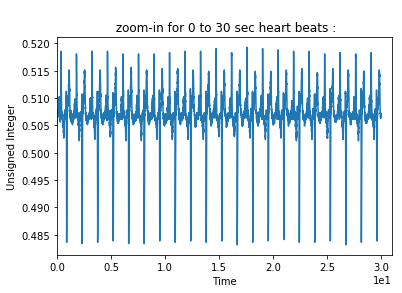

In [35]:
t=np.arange(22500)
B=0
x1=np.arange(0,22500/750.,1/750.)
plt.plot(x1,AllSignal[:22500]/4096)
plt.title('\n zoom-in for 0 to 30 sec heart beats :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer')
plt.xlim([0,31])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
x=np.amax(AllSignal[:750])
print 'Q,R,S peak is ' +str (x)
for index in t:
    if AllSignal[index]>=2124:
        B=B+1
print 'Heart beats for one minute is ' +str(B*2)        
        
    
        



# Question9 & 10

Peak in DFT is 4.98149090804
Maximam is observed at f=1.39275766017


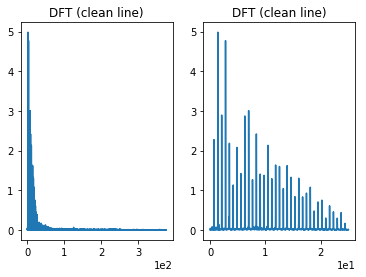

In [36]:
from __future__ import division
Line=AllSignal[:43080]
L2=np.arange(21540)
#At first dc must me removed
dataF=Line-np.mean(Line)
L=len(dataF)

#after ftt the frequencies will be between 0 and 1/2 of sampling frequency
f=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#here we are taking only positive elements (L/2) and we are normalizing it
 


plt.subplot(121)
plt.plot(f, PyyClean[:21540])
plt.title('DFT (clean line)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT (clean line)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
p=np.amax(PyyClean[:21540])
print 'Peak in DFT is ' +str(p)
for index in L2:
    if PyyClean[index]>=4.9814:
        print 'Maximam is observed at f=' +str(index/57.44)  
        break 
       

        
        

    

# Question11

Heart rate H is

$$H=\frac{60}{f}$$  where f is frequency at peak observed

$$H=44$$

# Question12 

DFT states the frequency analysis of any signal. Here in the signal higher peaks shows the harmonics of the heartbeat where as
lower are noise which can be removed by lowpass filter as it is low signal. from the above we got f=1.392 so here H=60/f  
That is H=60/1.392 therefore H = 43.10bpm (approx heart rate)

# Question13

Higher the order of the filter.Higher will be the effect on amplitude of the signal so here we use the lowpass filter so that it wont effect the amplitude of the signal.

# Question14 & 15

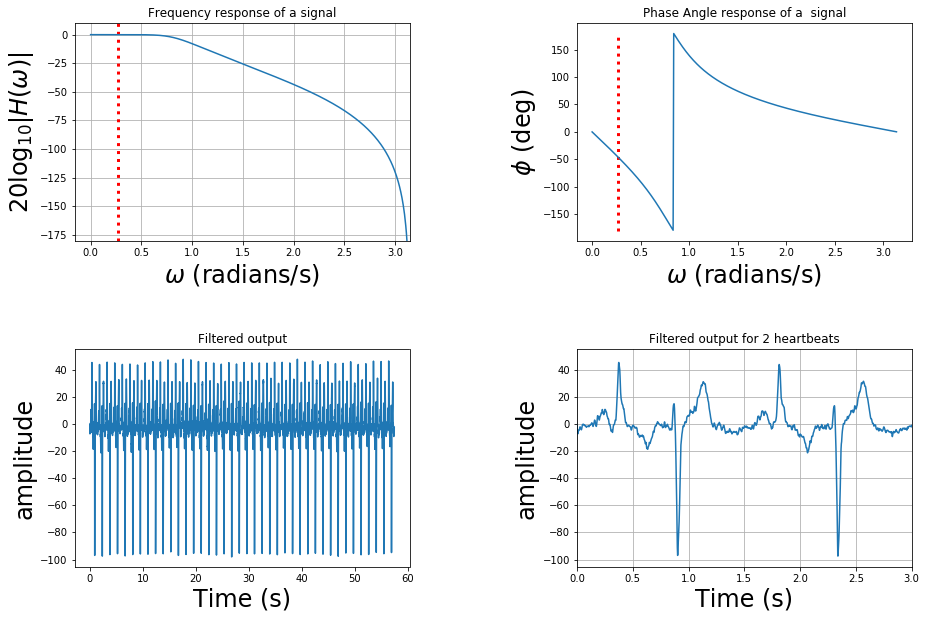

In [37]:
from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response of a signal')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=24)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=24)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response of a  signal')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=24)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=24)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s)
ax.set_title('Filtered output')
ax.set_ylabel("amplitude",fontsize=24)
ax.set_xlabel('Time (s)',fontsize=24)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s)
ax.set_xlim(xmax = 3, xmin =0)
ax.set_title('Filtered output for 2 heartbeats')
ax.set_ylabel("amplitude",fontsize=24)
ax.set_xlabel('Time (s)',fontsize=24)

ax.grid()

# Question16

Peak in DFT is 4.98133389394
Maximum is observed at f=1.39275766017


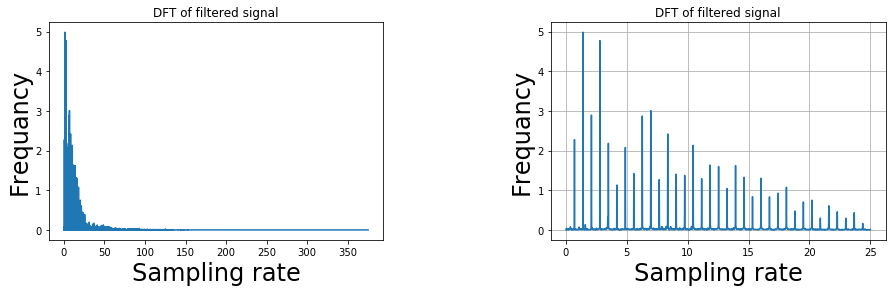

In [38]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

LL=len(s)
#after ftt the frequencies will be between 0 and 1/2 of sampling frequency
ff=np.arange(0,750/2,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#here we are taking only positive elements (L/2) and we are normalizing it
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("Frequancy",fontsize=24)
ax.set_xlabel('Sampling rate',fontsize=24)
indx=np.where(ff>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("Frequancy",fontsize=24)
ax.set_xlabel('Sampling rate',fontsize=24)

ax.grid()

p=np.amax(Pyy[:21540])
print 'Peak in DFT is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 

# Question17

Butterworth filters is the smooth, monotonically decreasing frequency response in the transition region.If u increase the order
of the filter the amplitude will get disturbed. Atlast there is no effect on amplitude of Signal because we used lowpass filter 
so can remains same as before i. it didnt effected the signal

# References

1. noise removal
   http://www.ijaiem.org/Volume5Issue2/IJAIEM-2016-02-25-22.pdf
2. introduction of EEG & ECG signals
   http://www.meo.etc.upt.ro/materii/cursuri/PSB/5.pdf
3. Choosing the filter and effects of filter
   http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.699.9049&rep=rep1&type=pdf
4. http://zone.ni.com/reference/en-XX/help/370859J-01/genmaths/genmaths/calc_filterfir_iir/
5. http://ieeexplore.ieee.org/document/7020590/